# Quantitative activity prediction (regression)

In [51]:
import pandas as pd
import numpy as np
df = pd.read_csv("../src/prot_features_reg.csv")
X = df.iloc[:,1:(len(df.columns)-1)].values
y = df['activity']
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
import pickle

with open('../src/reg/X_train.pkl','wb') as f:
    pickle.dump(X_train,f)
    
with open('../src/reg/X_test.pkl','wb') as f:
    pickle.dump(X_test,f)

with open('../src/reg/y_train.pkl','wb') as f:
    pickle.dump(y_train,f)
    
with open('../src/reg/y_test.pkl','wb') as f:
    pickle.dump(y_test,f)

## 1. Random Forest (with Inactivity)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

import numpy as np

model = []
cv_r2score = []
test_r2score = []

regr = make_pipeline(MinMaxScaler(), RandomForestRegressor(bootstrap=True, n_estimators=1000, min_samples_leaf=5, min_samples_split=2))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.5869369502808662


0.5789513449210872


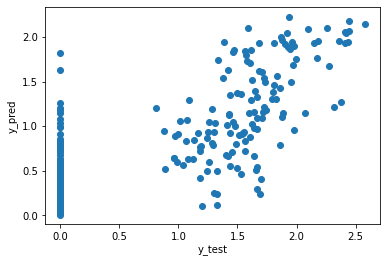

In [53]:
from sklearn.metrics import r2_score
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('RF')

Text(0.5, 1.0, 'Distribution of Y TEST')

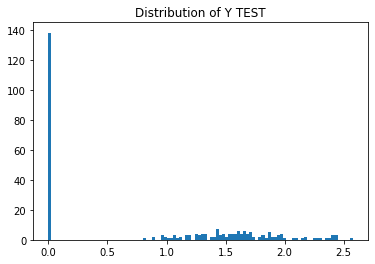

In [54]:
hist = plt.hist(y_test, bins=100)
plt.title("Distribution of Y TEST")

# 1a. Random Forest (without Inactivity)

In [81]:
df = pd.read_csv("../src/prot_features_reg.csv")
for index,row in df.iterrows():
    if row['activity']==0:
        df.drop(index, inplace=True)
    else:
        pass
X = df.iloc[:,1:(len(df.columns)-1)].values
y = df['activity']
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


hist = plt.hist(y_test, bins=200)
plt.title("Distribution of Y TEST")


0.6061413202231765


In [ ]:
from sklearn.preprocessing import StandardScaler

model = []
cv_r2score = []
test_r2score = []

regr = make_pipeline(StandardScaler(), RandomForestRegressor(bootstrap=True, n_estimators=1000, min_samples_leaf=5, max_features=168))
scores = cross_validate(regr, X_train, y_train, cv=10, scoring="r2")
cv_r2score.append(np.mean(scores['test_score']))
print(np.mean(scores['test_score']))

0.6472721599860782


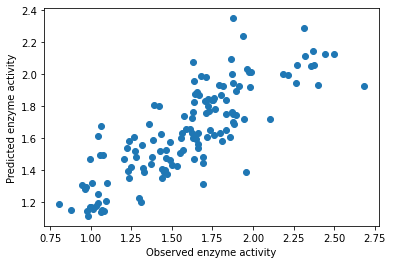

In [97]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Observed enzyme activity")
plt.ylabel("Predicted enzyme activity")
print(r2_score(y_test, y_pred))
test_r2score.append(r2_score(y_test, y_pred))
model.append('RF')

Text(0, 0.5, 'Residuals')

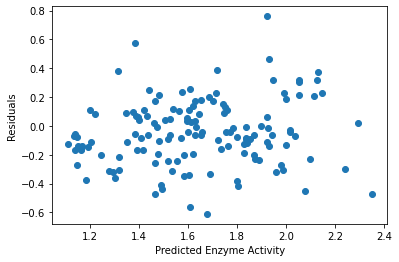

In [98]:
residual = (y_test - y_pred)
plt.scatter(y_pred,residual)
plt.xlabel("Predicted Enzyme Activity")
plt.ylabel("Residuals")

## 2. Multivariate adaptive regression splines

In [99]:
# 

In [96]:
#

## 3. Elastic Net

In [93]:
#

In [94]:
#

## 4. Summary

<img src="../png/reg.png" style="height: 250px; width:800px"/>